My project highlights the influence of Caitlin Clark and the Indiana Fever on WNBA attendance during the 2023–2024 seasons. I collected game-level attendance data and will compare it with online popularity measures to examine how Clark’s star power and social media presence impact fan turnout.

# **Assignment P1**

In [ ]:
import pandas as pd
from pytrends.request import TrendReq

## 1. Load existing attendance data

In [ ]:
attendance_df = pd.read_csv("/content/sample_data/attendance.csv")

# Filter only 2023 - 2024 seasons
attendance_cleaned = attendance_df[attendance_df["Year"].isin([2022, 2023, 2024, 2025])].copy()

# Drop any unwanted index columns if present
if "Unnamed: 0" in attendance_cleaned.columns:
    attendance_cleaned = attendance_cleaned.drop(columns=["Unnamed: 0"])

# Create new column of date-time
attendance_cleaned['Date'] = pd.to_datetime(
    attendance_df['Month'] + ' ' +
    attendance_df['Day'].astype(str) + ', ' +
    attendance_df['Year'].astype(str)
)

# Save the cleaned version
attendance_cleaned.to_csv("/content/sample_data/Attendance_2022-2025.csv", index=False)

print("Cleaned file saved as Attendance_2022-2025.csv")
attendance_cleaned.head()

Cleaned file saved as Attendance_2022-2025.csv


,Year,Day of Week,Month,Day,Time (ET),Game Type,Home Team,Away Team,Arena,City,State,Attendance,Date
5450,2022,Friday,May,6,7:00 PM,Regular season,Washington Mystics,Indiana Fever,Entertainment and Sports Arena,Washington,DC,4200,2022-05-06
5451,2022,Friday,May,6,8:00 PM,Regular season,Chicago Sky,Los Angeles Sparks,Wintrust Arena,Chicago,IL,8111,2022-05-06
5452,2022,Friday,May,6,10:00 PM,Regular season,Phoenix Mercury,Las Vegas Aces,Footprint Center,Phoenix,AZ,7167,2022-05-06
5453,2022,Friday,May,6,10:00 PM,Regular season,Seattle Storm,Minnesota Lynx,Climate Pledge Arena,Seattle,WA,12904,2022-05-06
5454,2022,Saturday,May,7,6:00 PM,Regular season,New York Liberty,Connecticut Sun,Barclays Center,Brooklyn,NY,6829,2022-05-07


## 2. Get Google Trends data in Indiana for Caitlin Clark and Other Star Players + Indiana Fever

In [ ]:
pytrends = TrendReq(hl='en-US', tz=360)

keywords = ["Caitlin Clark", "Indiana Fever"]

# Add error handling for the API request
try:
    pytrends.build_payload(kw_list=keywords, timeframe='2022-01-01 2025-10-10', geo='US-IN')
    trends_df = pytrends.interest_over_time().reset_index()

    # Drop 'isPartial' column if present
    if 'isPartial' in trends_df.columns:
        trends_df = trends_df.drop(columns=['isPartial'])

    # Save data
    trends_df.to_csv("fever_trends.csv", index=False)

    print("Cleaned file saved as fever_trends.csv")
    display(trends_df.head())

except Exception as e:
    print(f"An error occurred while fetching Google Trends data: {e}")
    print("Please check your keywords, timeframe, and try running the cell again.")

Cleaned file saved as fever_trends.csv


,date,Caitlin Clark,Indiana Fever
0,2021-12-26,0,1
1,2022-01-02,0,1
2,2022-01-09,0,1
3,2022-01-16,0,1
4,2022-01-23,0,1


In [ ]:
pytrends = TrendReq(hl='en-US', tz=360)

keywords = ["Sabrina Ionescu", "New York Liberty"]

# Add error handling for the API request
try:
    pytrends.build_payload(kw_list=keywords, timeframe='2022-01-01 2025-10-10', geo='US-IN')
    liberty_trends_df = pytrends.interest_over_time().reset_index()

    # Drop 'isPartial' column if present
    if 'isPartial' in trends_df.columns:
        liberty_trends_df = liberty_trends_df.drop(columns=['isPartial'])

    # Save data
    liberty_trends_df.to_csv("liberty_trends.csv", index=False)

    print("Cleaned file saved as liberty_trends.csv")
    display(liberty_trends_df.head())

except Exception as e:
    print(f"An error occurred while fetching Google Trends data: {e}")
    print("Please check your keywords, timeframe, and try running the cell again.")

Cleaned file saved as liberty_trends.csv


,date,Sabrina Ionescu,New York Liberty,isPartial
0,2021-12-26,0,0,False
1,2022-01-02,0,0,False
2,2022-01-09,0,0,False
3,2022-01-16,0,0,False
4,2022-01-23,0,0,False


## 3. Preview datasets

In [ ]:
trends_df = pd.read_csv("fever_trends.csv")
print("Attendance data sample:")
print(attendance_cleaned["Home Team"].isin(['Indiana Fever']).head())

print("\nGoogle Trends data sample:")
print(trends_df.head())

Attendance data sample:
5450    False
5451    False
5452    False
5453    False
5454    False
Name: Home Team, dtype: bool

Google Trends data sample:
         date  Caitlin Clark  Indiana Fever
0  2021-12-26              0              1
1  2022-01-02              0              1
2  2022-01-09              0              1
3  2022-01-16              0              1
4  2022-01-23              0              1


# brief description of our implementation, and the type of data we collected

IMPLEMENTATION:

For this project, we began with a CSV file containing WNBA game attendance records. Using Python and the pandas library, we wrote a script that:

- Loaded the original dataset (attendace.csv).

- Filtered the data to include only games from the 2023 and 2024 seasons, since our project focuses on recent years where social media and fan engagement have been particularly influential.

- Dropped unnecessary index columns

- Saved the cleaned dataset to a new CSV file (Attendance_2023_2024.csv), which can now be used for analysis and visualization in later assignments.

This setup makes it possible to merge the attendance data with external sources such as Google Trends or social media metrics in order to analyze the relationship between public attention online and game attendance.

TYPE OF DATA:

The dataset contains game-level attendance data from the WNBA, including:
Year of the game (2023–2024)
Day of the week and date (Month/Day)
Game time (ET)
Game type (Regular season, Playoffs, etc.)
Home team and away team
Arena, city, and state
Reported attendance (numeric)

This is structured numerical and categorical data, suitable for analysis, visualization, and correlation with other indicators.

# **Assignment P2**

> **IMPORTANT** **NOTE**

We noticed that this assignment does not really help us conduct the data you're looking for in this assignment. Scroll to


> **Attempted Linear Regression for Indiana/NYL Attendance and Trends**


to see direct results of this Assignment 2., however we've decided to keep the previous information in order to prepare for our presentation. If you beliieve that this section is not comprehensive for the assignment, we urge you to investigate our other sections before grading.

In [ ]:
# import libraries
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
from scipy import stats
import datetime as dt
import pandas as pd


## New York Liberty & Indiana Fever: Loading Data and Plotting Trends vs Attendance

In [ ]:
# Load attendance data
df = pd.read_csv('Attendance_2022-2025.csv')

# Filter New York Liberty home games
liberty_home = df[df['Home Team'] == 'New York Liberty'].copy()

# Convert 'Date' to datetime and set as index
liberty_home['Date'] = pd.to_datetime(liberty_home['Date'])
liberty_home.set_index('Date', inplace=True)

# Aggregate attendance per week (mean per game)
liberty_attendance_weekly = liberty_home['Attendance'].resample('W-MON').mean()

# Load Google Trends data
libertytrends_df = pd.read_csv('liberty_trends.csv')

# Convert date to datetime and set as index
libertytrends_df['date'] = pd.to_datetime(libertytrends_df['date'])
libertytrends_df.set_index('date', inplace=True)

# Resample weekly (just to be safe)
liberty_trends_weekly = libertytrends_df['Sabrina Ionescu'].resample('W-MON').mean()

# Merge weekly data
liberty_weekly_data = pd.merge(liberty_attendance_weekly, liberty_trends_weekly, left_index=True, right_index=True)

## Indiana Fever: Loading Data and Plotting Trends vs Attendance

In [ ]:
# Filter Indiana Fever home games
fever_home = df[df['Home Team'] == 'Indiana Fever'].copy()

# Convert 'Date' to datetime and set as index
fever_home['Date'] = pd.to_datetime(fever_home['Date'])
fever_home.set_index('Date', inplace=True)

# Aggregate attendance per week (mean per game)
attendance_weekly = fever_home['Attendance'].resample('W-MON').mean()

# Load Google Trends data
indianatrends_df = pd.read_csv('fever_trends.csv')

# Convert date to datetime and set as index
indianatrends_df['date'] = pd.to_datetime(indianatrends_df['date'])
indianatrends_df.set_index('date', inplace=True)

# Resample weekly (just to be safe)
trends_weekly = indianatrends_df['Caitlin Clark'].resample('W-MON').mean()

# Merge weekly data
weekly_data = pd.merge(attendance_weekly, trends_weekly, left_index=True, right_index=True)


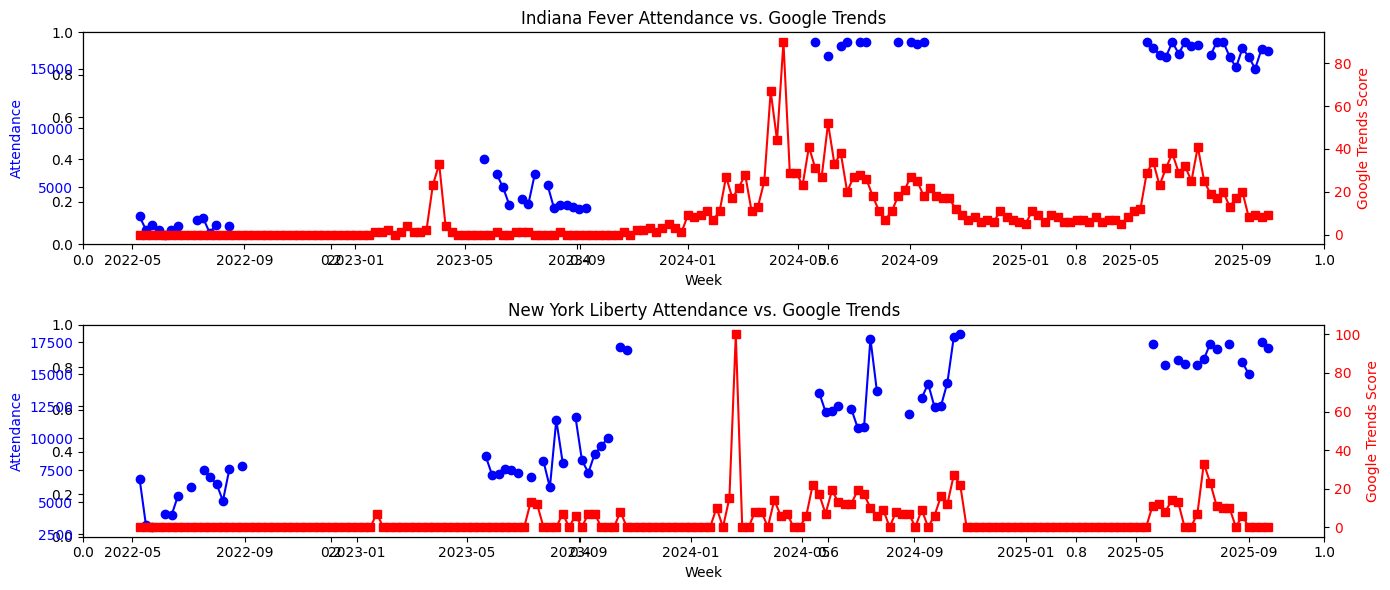

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14,6))

# Plot attendance on primary y-axis
ax1 = fig.add_subplot(2,1,1)
ax1.plot(weekly_data.index, weekly_data['Attendance'], color='blue', marker='o', label='Attendance')
ax1.set_xlabel('Week')
ax1.set_ylabel('Attendance', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot Google Trends on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(weekly_data.index, weekly_data['Caitlin Clark'], color='red', marker='s', label='Google Trends')
ax2.set_ylabel('Google Trends Score', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and layout
ax1.set_title('Indiana Fever Attendance vs. Google Trends')


# Plot attendance on primary y-axis
ax3 = fig.add_subplot(2,1,2)
ax3.plot(liberty_weekly_data.index, liberty_weekly_data['Attendance'], color='blue', marker='o', label='Attendance')
ax3.set_xlabel('Week')
ax3.set_ylabel('Attendance', color='blue')
ax3.tick_params(axis='y', labelcolor='blue')

# Plot Google Trends on secondary y-axis
ax4 = ax3.twinx()
ax4.plot(liberty_weekly_data.index, liberty_weekly_data['Sabrina Ionescu'], color='red', marker='s', label='Google Trends')
ax4.set_ylabel('Google Trends Score', color='red')
ax4.tick_params(axis='y', labelcolor='red')

# Title and layout
ax3.set_title('New York Liberty Attendance vs. Google Trends')

fig.tight_layout()
plt.show()

This plot is signifigant for a few reasons, but it is important to note a few important things: Caitlin was drafted into the WNBA for the 2024 season, and Sabrina Ionescu was drafted into the WNBA for the 2020 season ; the WNBA is growing in popularity, so it is expected that with or without a star player, the game attendance will rise over time.

However, the spike we see when Caitlin enters the league in 2023 is incredible compared to New Yorks steady increase in attendance. You can clearly see how the social media spikes with Caitlin as a search also induces a massive spike in attendance to Indiana Fever home games. While social media may not be the "reason" people are going to games- it certainly implies that people were more excited to attend games when Caitlin Arrived

## Attempted Linear Regression for Indiana/NYL Attendance and Trends

In [ ]:
# --- Scatter plot with linear regression ---
x1 = weekly_data['Caitlin Clark']
y1 = weekly_data['Attendance']

# Linear regression
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(x1, y1)
line1 = slope1 * x1 + intercept1

print(f"Pearson correlation (r): {r_value1:.3f}")
print(f"P-value: {p_value1:.3g}")

Pearson correlation (r): nan
P-value: nan


In [ ]:
# Filter for 2024–2025 only
df = weekly_data[(weekly_data.index.year >= 2024) & (weekly_data.index.year <= 2025)].copy()

# Remove missing or non-numeric values
df = df[['Caitlin Clark', 'Attendance']].dropna()

# linear regression
x2 = df['Caitlin Clark'].values
y2 = df['Attendance'].values
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x2, y2)

# Sort and predict for plotting
order = np.argsort(x2)
x_sorted = x2[order]
y_pred = slope2 * x_sorted + intercept2

print(f"Pearson correlation (r): {r_value2:.3f}")
print(f"P-value: {p_value2:.3g}")


Pearson correlation (r): 0.291
P-value: 0.125


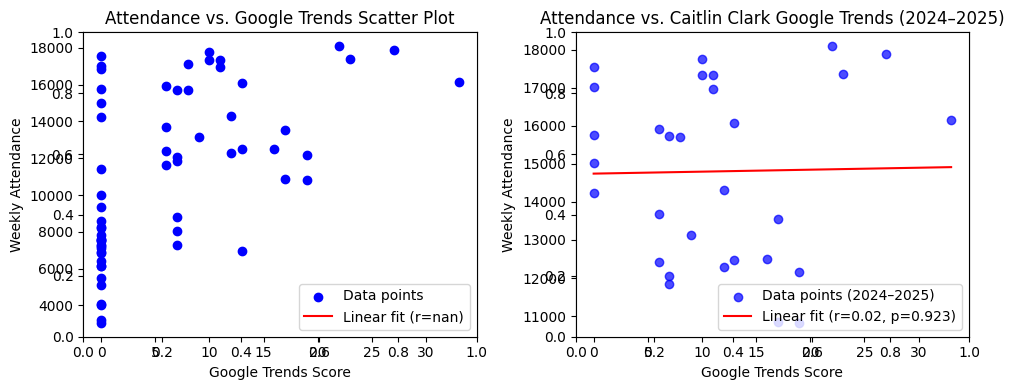

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# plotting 2022-2025 data
plt1 = fig.add_subplot(1,2,1)
plt1.scatter(x1, y1, color='blue', label='Data points')
plt1.plot(x1, line1, color='red', label=f'Linear fit (r={r_value1:.2f})')
plt1.set_xlabel('Google Trends Score')
plt1.set_ylabel('Weekly Attendance')
plt1.set_title('Attendance vs. Google Trends Scatter Plot')
plt1.legend()

# fixed plotting 2024-2025 data
plt2 = fig.add_subplot(1,2,2)
plt2.scatter(x2, y2, color='blue', alpha=0.7, label='Data points (2024–2025)')
plt2.plot(x_sorted, y_pred, color='red', label=f'Linear fit (r={r_value2:.2f}, p={p_value2:.3g})')
plt2.set_xlabel('Google Trends Score')
plt2.set_ylabel('Weekly Attendance')
plt2.set_title('Attendance vs. Caitlin Clark Google Trends (2024–2025)')
plt2.legend()

plt.tight_layout()
plt.show()

# for later plotting
caitlin_df = weekly_data.copy()

Sabrina Ionescu 2020–2025 correlation (r): 0.543
P-value: 5.21e-06


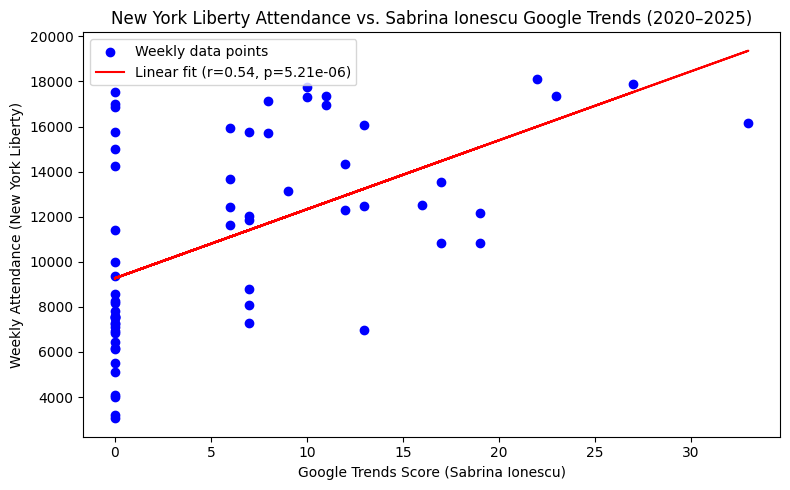

In [ ]:


# --- Load attendance and trends ---
attendance = pd.read_csv("Attendance_2022-2025.csv", parse_dates=["Date"])
trends = pd.read_csv("liberty_trends.csv", parse_dates=["date"])

# If needed, rename columns
trends.rename(columns={"date": "Week"}, inplace=True)

# Filter for New York Liberty home games
liberty_home = attendance[attendance['Home Team'] == 'New York Liberty'].copy()

# Convert 'Date' to datetime and set as index
liberty_home['Date'] = pd.to_datetime(liberty_home['Date'])
liberty_home.set_index('Date', inplace=True)

# Aggregate attendance per week (mean per game)
attendance_weekly = liberty_home['Attendance'].resample('W-MON').mean()

# Convert trends to datetime and set as index
trends['Week'] = pd.to_datetime(trends['Week'])
trends.set_index('Week', inplace=True)

# Use the Sabrina Ionescu column (update if your column name differs)
trend_col = 'Sabrina Ionescu' if 'Sabrina Ionescu' in trends.columns else trends.columns[0]
trends_weekly = trends[trend_col].resample('W-MON').mean()

# Merge attendance + trends data
weekly_data = pd.merge(attendance_weekly, trends_weekly, left_index=True, right_index=True)
weekly_data.columns = ['Attendance', 'Sabrina Ionescu']

# Drop missing data
weekly_data = weekly_data.dropna()

# --- Linear regression (2020–2025 entire career) ---
x = weekly_data['Sabrina Ionescu']
y = weekly_data['Attendance']

# Calculate regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

print(f"Sabrina Ionescu 2020–2025 correlation (r): {r_value:.3f}")
print(f"P-value: {p_value:.3g}")

# --- Plot ---
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', label='Weekly data points')
plt.plot(x, line, color='red', label=f'Linear fit (r={r_value:.2f}, p={p_value:.3g})')
plt.xlabel('Google Trends Score (Sabrina Ionescu)')
plt.ylabel('Weekly Attendance (New York Liberty)')
plt.title('New York Liberty Attendance vs. Sabrina Ionescu Google Trends (2020–2025)')
plt.legend()
plt.tight_layout()
plt.show()

## For later plotting
sabrina_df = weekly_data.copy()



> **Brief Description and interpretation of the visualizations**

While reviewing these two graphs, the linear regression doesn't necessarily show much when it comes to the grwoth of the league and Caitlin Clark's impact. While Sabrina Ionescu's linear regression looks better than Caitlin's at first glance, upon further inspection, you can see that Caitlin's Google Trends scores are much higher than Sabrina's. Ionescu's Google trend score never appears higher than 40, whereas Clark's score has ranged up around the 50s. It's not many points different (especially since only a few of Clark's scores get that high), but this is also keeping in mind that Clark has been playing in this league for two seasons. Ionescu has played her 6th season now. So, while Ionescu's linear regression may look more straight forward, Clark's already growing Google trend score has the possibility of affecting attendance scores as she gets out of her Rookie years..

Additionally, Caitlin Clark was injured for the majority of her second season in the WNBA. Therefore, there are many fans who did not attend games because they were aware that she was not playing.

In [ ]:
# Making side by side

## --- Load attendance and trends ---
attendance = pd.read_csv("Attendance_2022-2025.csv", parse_dates=["Date"])
trends = pd.read_csv("fever_trends.csv", parse_dates=["date"])

trends.rename(columns={"date": "Week"}, inplace=True)

# Filter for Indiana Fever home games
fever_home = attendance[attendance['Home Team'] == 'Indiana Fever'].copy()

fever_home['Date'] = pd.to_datetime(fever_home['Date'])
fever_home.set_index('Date', inplace=True)

attendance_weekly = fever_home['Attendance'].resample('W-MON').mean()

trends['Week'] = pd.to_datetime(trends['Week'])
trends.set_index('Week', inplace=True)

# Dynamically find Caitlin Clark column
trend_col = None
for col in trends.columns:
    if "Caitlin" in col or "Clark" in col:
        trend_col = col
        break

if trend_col is None:
    raise ValueError("Couldn't find a Caitlin Clark column in fever_trends.csv!")

print(f"Using trend column: {trend_col}")

trends_weekly = trends[trend_col].resample('W-MON').mean()

weekly_data = pd.merge(attendance_weekly, trends_weekly, left_index=True, right_index=True)
weekly_data.columns = ['Attendance', 'Caitlin Clark']
weekly_data = weekly_data.dropna()

caitlin_df = weekly_data.copy()


Using trend column: Caitlin Clark


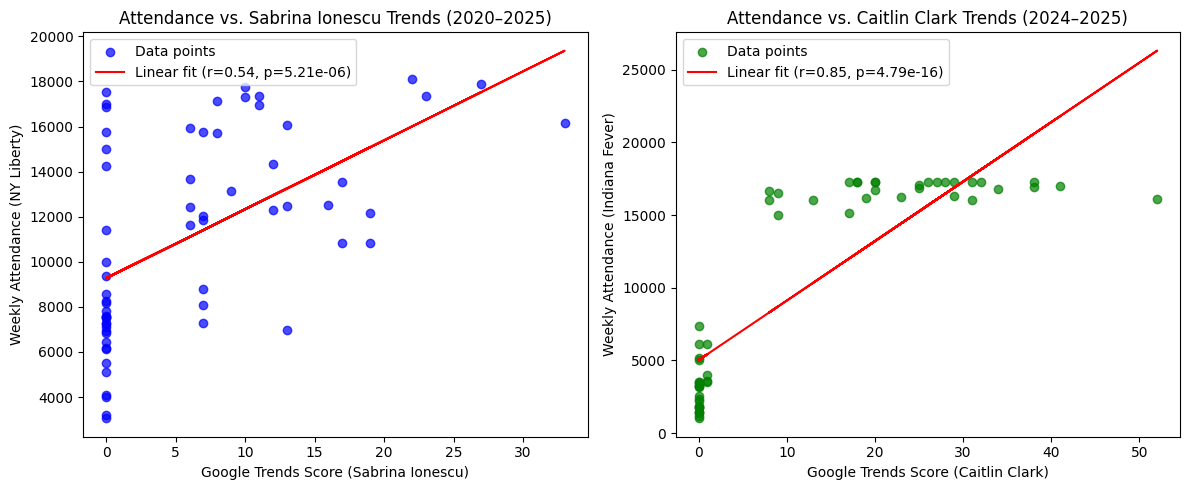

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# --- Sabrina regression ---
x_sabrina = sabrina_df['Sabrina Ionescu']
y_sabrina = sabrina_df['Attendance']
slope_s, intercept_s, r_s, p_s, _ = linregress(x_sabrina, y_sabrina)
line_s = slope_s * x_sabrina + intercept_s

# --- Caitlin regression ---
x_clark = caitlin_df['Caitlin Clark']
y_clark = caitlin_df['Attendance']
slope_c, intercept_c, r_c, p_c, _ = linregress(x_clark, y_clark)
line_c = slope_c * x_clark + intercept_c

# --- Two-panel plot ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Panel 1: Sabrina
axes[0].scatter(x_sabrina, y_sabrina, color='blue', alpha=0.7, label='Data points')
axes[0].plot(x_sabrina, line_s, color='red', label=f'Linear fit (r={r_s:.2f}, p={p_s:.3g})')
axes[0].set_xlabel('Google Trends Score (Sabrina Ionescu)')
axes[0].set_ylabel('Weekly Attendance (NY Liberty)')
axes[0].set_title('Attendance vs. Sabrina Ionescu Trends (2020–2025)')
axes[0].legend()

# Panel 2: Caitlin
axes[1].scatter(x_clark, y_clark, color='green', alpha=0.7, label='Data points')
axes[1].plot(x_clark, line_c, color='red', label=f'Linear fit (r={r_c:.2f}, p={p_c:.3g})')
axes[1].set_xlabel('Google Trends Score (Caitlin Clark)')
axes[1].set_ylabel('Weekly Attendance (Indiana Fever)')
axes[1].set_title('Attendance vs. Caitlin Clark Trends (2024–2025)')
axes[1].legend()

plt.tight_layout()
plt.show()


Last note: Not sure why the attendance is different for Caitlin Clark's graph data when it is run individually versus when they are shown together.

## Comparing Histograms of Attendance With/Without Indiana Fever and Caitlin Clark

In [ ]:
df = pd.read_csv('Attendance_2022-2025.csv')
# Create two categories:
# 1. Attendance for each team when Indiana Fever is the opponent
fever_games = df[df['Away Team'] == 'Indiana Fever']

# 2. Attendance for each team when Indiana Fever is NOT the opponent
other_games = df[df['Away Team'] != 'Indiana Fever']

In [ ]:
# Calculate mean attendance for each team
mean_fever = fever_games.groupby('Home Team')['Attendance'].mean()
mean_other = other_games.groupby('Home Team')['Attendance'].mean()

In [ ]:
attendance_compare = pd.DataFrame({
    'With Indiana': mean_fever,
    'Without Indiana': mean_other})

In [ ]:
# Now try grouping attendance by Year
mean_fever_year = fever_games.groupby('Year')['Attendance'].mean()
mean_other_year = other_games.groupby('Year')['Attendance'].mean()

In [ ]:
attendance_compare2 = pd.DataFrame({
    'With Indiana': mean_fever_year,
    'Without Indiana': mean_other_year})

# Replace NaN with 0 for teams that never played Indiana at home
attendance_compare2 = attendance_compare2.fillna(0)

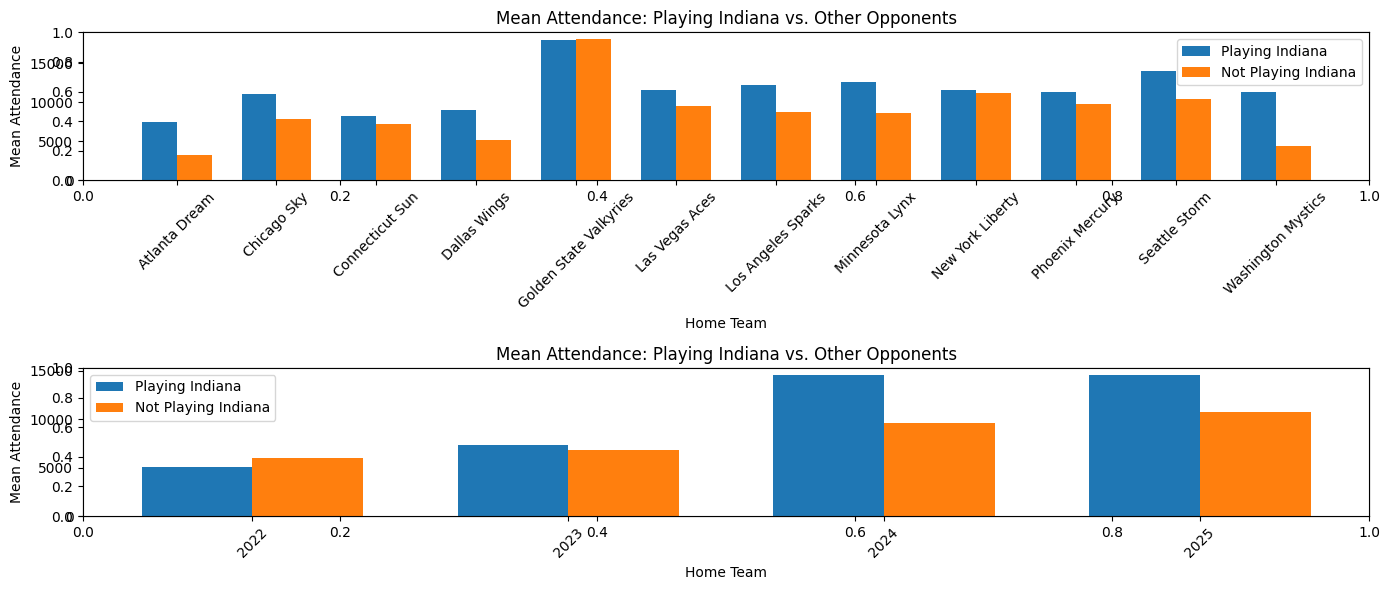

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14,6))

# --- Graph of Team's Attendance With/Without Indiana ---

# get rid of unwanted teams
attendance_compare = attendance_compare.drop(
    index=["Team WNBA", "Team Wilson", "Team Clark", "Indiana Fever"], errors="ignore")

teams = attendance_compare.index
x1 = np.arange(len(teams))  # the label locations
width1 = 0.35  # width of the bars

ax1 = fig.add_subplot(2,1,1)
ax1.bar(x1 - width1/2, attendance_compare['With Indiana'], width1, label='Playing Indiana')
ax1.bar(x1 + width1/2, attendance_compare['Without Indiana'], width1, label='Not Playing Indiana')

ax1.set_xlabel('Home Team')
ax1.set_ylabel('Mean Attendance')
ax1.set_title('Mean Attendance: Playing Indiana vs. Other Opponents')
ax1.set_xticks(x1)
ax1.set_xticklabels(teams, rotation=45)
ax1.legend()

# --- Graph of Attendance Per Year With/Without Indiana ---
years = attendance_compare2.index
x2 = np.arange(len(years))  # the label locations
width2 = 0.35  # width of the bars

ax2 = fig.add_subplot(2,1,2)
ax2.bar(x2 - width2/2, attendance_compare2['With Indiana'], width2, label='Playing Indiana')
ax2.bar(x2 + width2/2, attendance_compare2['Without Indiana'], width2, label='Not Playing Indiana')

ax2.set_xlabel('Home Team')
ax2.set_ylabel('Mean Attendance')
ax2.set_title('Mean Attendance: Playing Indiana vs. Other Opponents')
ax2.set_xticks(x2)
ax2.set_xticklabels(years, rotation=45)
ax2.legend()

plt.tight_layout()
plt.show()


These graphs are particlarly interesting because you can very clearly see how impactful Indiana is on opponents attendance. There is a visable difference between attendance when a team plays Indiana, and when we look at the difference over the course of the past 4 years, we can see that margin grow even larger. When Caitlin started playing at Indiana, other teams' attendance spiked when Indiana was on the road. This shows that people from all over are coming to support Indaina Fever and Caitlin Clark due to her impact on the WNBA and the sports world in general.

## Histograms of Attendance With/Without New York Liberty and Sabrina Ionescu


In [ ]:
df = pd.read_csv('Attendance_2022-2025.csv')
# Create two categories:
# 1. Attendance for each team when New York Liberty is the opponent
liberty_games = df[df['Away Team'] == 'New York Liberty']

# 2. Attendance for each tea when NYL is NOT the opponent
notlib_games = df[df['Away Team'] != 'New York Liberty']

In [ ]:
# Calculating mean attendance for each game category
mean_lib = liberty_games.groupby('Home Team')['Attendance'].mean()
mean_notlib = notlib_games.groupby('Home Team')['Attendance'].mean()

In [ ]:
lib_attendance_compare = pd.DataFrame({
    'With New York Liberty': mean_lib,
    'Without New York Liberty': mean_notlib})

In [ ]:
# Grouping attendance per Year
mean_lib_year = liberty_games.groupby('Year')['Attendance'].mean()
mean_notlib_year = notlib_games.groupby('Year')['Attendance'].mean()

In [ ]:
lib_attendance_compare2 = pd.DataFrame({
    'With New York Liberty': mean_lib_year,
    'Without New York Liberty': mean_notlib_year})

# Replace NaN with 0 for teams that never played New York Liberty at home
lib_attendance_compare2 = lib_attendance_compare2.fillna(0)

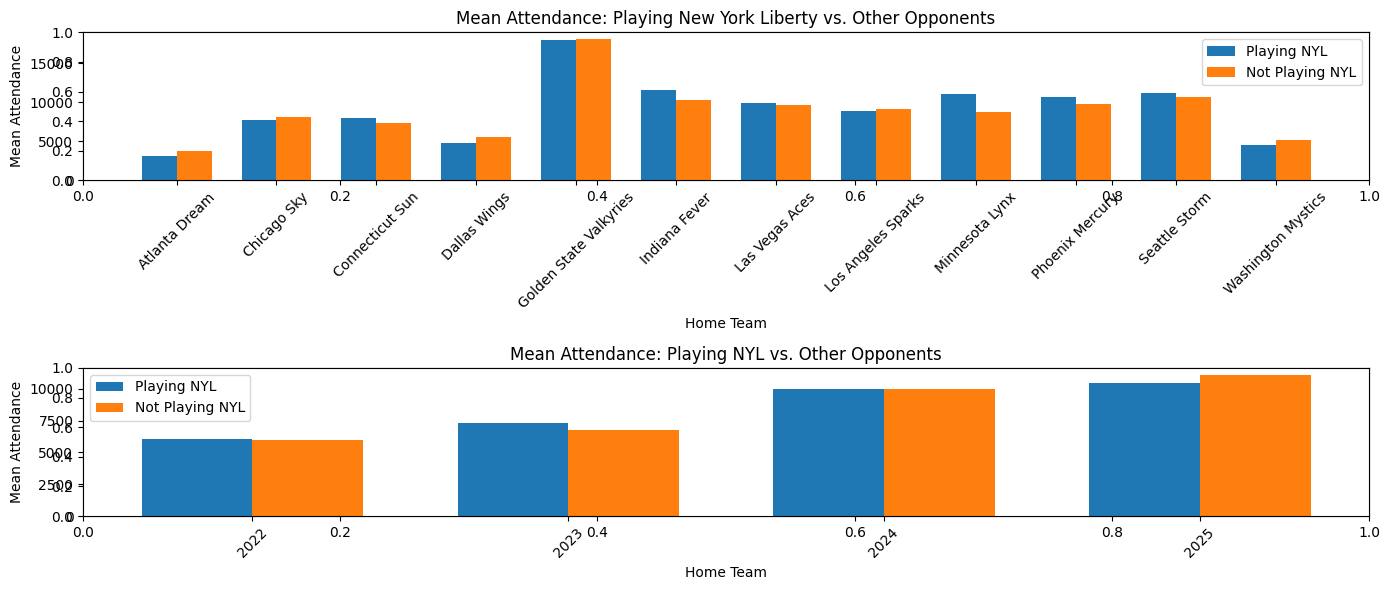

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14,6))

# --- Graph of Team's Attendance With/Without NYL ---

# get rid of unwanted teams
lib_attendance_compare = lib_attendance_compare.drop(
    index=["Team WNBA", "Team Wilson", "Team Clark", "New York Liberty"], errors="ignore")

teams = lib_attendance_compare.index
x1 = np.arange(len(teams))  # the label locations
width1 = 0.35  # width of the bars

ax1 = fig.add_subplot(2,1,1)
ax1.bar(x1 - width1/2, lib_attendance_compare['With New York Liberty'], width1, label='Playing NYL')
ax1.bar(x1 + width1/2, lib_attendance_compare['Without New York Liberty'], width1, label='Not Playing NYL')

ax1.set_xlabel('Home Team')
ax1.set_ylabel('Mean Attendance')
ax1.set_title('Mean Attendance: Playing New York Liberty vs. Other Opponents')
ax1.set_xticks(x1)
ax1.set_xticklabels(teams, rotation=45)
ax1.legend()

# --- Graph of Attendance Per Year With/Without NYL ---
years = lib_attendance_compare2.index
x2 = np.arange(len(years))  # the label locations
width2 = 0.35  # width of the bars

ax2 = fig.add_subplot(2,1,2)
ax2.bar(x2 - width2/2, lib_attendance_compare2['With New York Liberty'], width2, label='Playing NYL')
ax2.bar(x2 + width2/2, lib_attendance_compare2['Without New York Liberty'], width2, label='Not Playing NYL')

ax2.set_xlabel('Home Team')
ax2.set_ylabel('Mean Attendance')
ax2.set_title('Mean Attendance: Playing NYL vs. Other Opponents')
ax2.set_xticks(x2)
ax2.set_xticklabels(years, rotation=45)
ax2.legend()

plt.tight_layout()
plt.show()


As time passes, it's nice to see that the league has gotten more popular (for both Fever and Liberty) during these 2024 and 2025 seasons. This up in popularity does not appear to be due to the New York Liberty, according to the ticket sales alone. Golden State Valkyries data can be ignored since they basically sold out every single game in their inaugural season during 2025. But considering the others, it looks like NYL usually has an increased attendance while playing others but not everytime. While this is still impressive, it's not nearly as drastic as the attendance Fever gets when they play at home and away.

## Linear Regression with Attendance

In [ ]:
fever_means_list = mean_fever_year.tolist()
other_means_list = mean_other_year.tolist()

# data
x = np.array([2022, 2023, 2024, 2025])
y1 = np.array(fever_means_list)   # mean attendance when playing Indiana
y2 = np.array(other_means_list)   # mean attendance when not playing Indiana

In [ ]:
# linear regression for each
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(x, y1)
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x, y2)

line1 = slope1 * x + intercept1
line2 = slope2 * x + intercept2

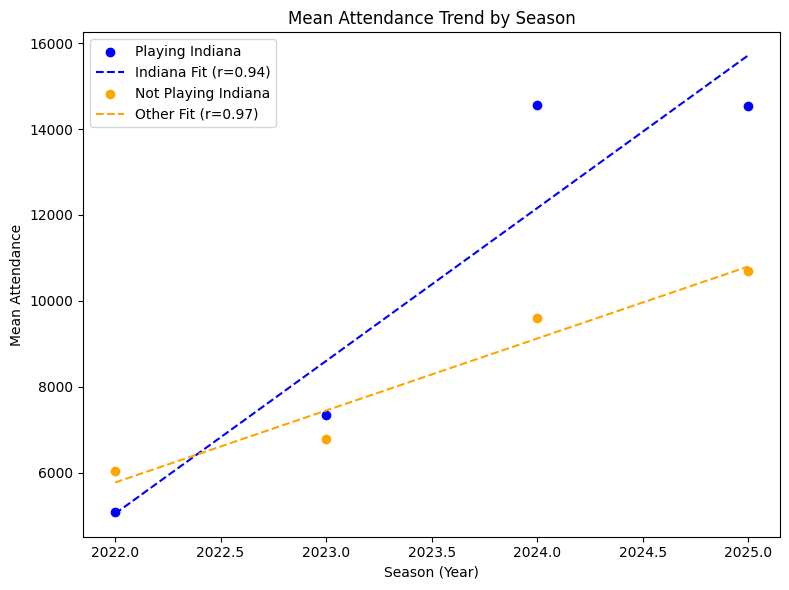

In [ ]:
# Plot
plt.figure(figsize=(8,6))
plt.scatter(x, y1, color='blue', label='Playing Indiana')
plt.plot(x, line1, color='blue', linestyle='--', label=f'Indiana Fit (r={r_value1:.2f})')

plt.scatter(x, y2, color='orange', label='Not Playing Indiana')
plt.plot(x, line2, color='orange', linestyle='--', label=f'Other Fit (r={r_value2:.2f})')

plt.xlabel('Season (Year)')
plt.ylabel('Mean Attendance')
plt.title('Mean Attendance Trend by Season')
plt.legend()
plt.tight_layout()
plt.show()

We expect the orange line to look like that because the attendance of the WNBA is growing gover time, but in the blue line we see the massive jump in attendance when Indiana is playing in a game, likely due to Caitlin's introduction into the league in 2023. It almost takes an exponential jump from 2022-23 and I expect the line to increase linearly from 2023 forward. This does show just how impactful Caitlin coming into the league was on attendance to WNBA basketball games, particularly ones involving the Indiana Fever.